## Figure 3a-b. Probability Density Distribution of Source Depths

In [1]:
%matplotlib inline
import os
import numpy as np
import scipy.io as sio
from matplotlib import pyplot as plt, ticker
from mintpy.defaults.plot import *

work_dir = os.path.expanduser('~/Papers/2021_Kirishima/figs_src/conceptual_model')
os.chdir(work_dir)
print('Go to directory', work_dir)

inv_dir = os.path.expanduser('~/Papers/2021_Kirishima/figs_src/model')

Go to directory /Users/yunjunz/Papers/2021_Kirishima/figs_src/conceptual_model


In [2]:
## Utilities function
def read_GBIS_depth(inv_file, model_code, burning=3e4, blankCells=9999, unit='km', ref_height=None):
    """ Get the estimation of the parameter
    Depth in GBIB is relative to mean sea level with positive downward.

    Parameters: inv_file : GBIS inversion result mat file
                model_code : index of the parameter, starting from 0
                burning : number of iterations to ignore in pdf histogram plot
                blankCells : Number of empty cells at the end of mKeep and pKeep
                offset : reference height
    Returns:    mKeep : 1D np.ndarray of all the estimation of the parameter
                optimal : the optional value
    """
    par_name = '{} Depth'.format(model_code2name[model_code])
    mat = sio.loadmat(inv_file, struct_as_record=False, squeeze_me=True)
    par_idx = list(mat['invResults'].model.parName).index(par_name)
    mKeep = mat['invResults'].mKeep[par_idx, int(burning):-blankCells]
    optimal = mat['invResults'].model.optimal[par_idx]

    ## convert to positive upward
    mKeep *= -1
    optimal *= -1

    if ref_height is not None:
        print('read depth with respect to {} m with positive downward'.format(ref_height))
        mKeep = ref_height - mKeep
        optimal = ref_height - optimal

    if unit == 'km':
        print('output depth in unit of km')
        mKeep *= 0.001
        optimal *= 0.001

    # stats for plot
    dmin = np.nanmean(mKeep) - 4 * np.nanstd(mKeep)
    dmax = np.nanmean(mKeep) + 4 * np.nanstd(mKeep)

    return mKeep, optimal, dmin, dmax


model_code2name = {
    'C' : 'CDMN',
    'C2': 'CDM2',
    'T' : 'MCTG',
}

print('Utilities function intiated.')

Utilities function intiated.


### Fig. 3a. Shinmoe-dake

read depth with respect to 1421 m with positive downward
output depth in unit of km
read depth with respect to 1421 m with positive downward
output depth in unit of km
save figure to /Users/yunjunz/Papers/2021_Kirishima/figs_src/conceptual_model/depths_PDF_Shinmoe.png


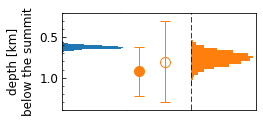

In [3]:
## plot
refH = 1421  #height of Shinmoe-dake in m
inv_files = [os.path.join(inv_dir, i) for i in ['Shinmoe2008post/invert_1_2_C/invert_1_2_C.mat', 
                                                'Shinmoe2017pre/invert_1_2_C/invert_1_2_C.mat']]
ds_names = [os.path.splitext(os.path.basename(i))[0] for i in inv_files]
m_codes = [i.split('invert_1_2_')[1].split('_')[-1] for i in ds_names]

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=[3, 1.5])
# 2008-2010 and 2014-2017
for i, ax in enumerate([axs[0], axs[2]]):
    depths, depthO, dmin, dmax = read_GBIS_depth(inv_files[i], m_codes[i], burning=3e4, ref_height=refH)
    ax.hist(depths, bins=20, range=(dmin, dmax), color='C{}'.format(i), orientation='horizontal', density=True)
# 2011-2013 from other literacture
ax = axs[1]
kwargs = dict(fmt='o', ms='10', color='C1', elinewidth=1, capsize=5)
ax.errorbar(x=0.2, y=refH/1000-0.500, yerr=0.300, fillstyle='full', **kwargs)
ax.errorbar(x=0.6, y=refH/1000-0.620, yerr=0.500, fillstyle='none', **kwargs)
ax.set_xlim(0,1)

# axis format
for ax in axs:
    ax.tick_params(which='both', direction='in', labelsize=font_size, bottom=False, top=False, left=True, right=False)
    ax.yaxis.set_major_locator(ticker.MultipleLocator(0.500))
    ax.set_xticks([])
    ax.invert_yaxis()
    ax.set_ylim(1.400, 0.200)
axs[0].yaxis.set_minor_locator(ticker.MultipleLocator(0.100))
axs[0].set_ylabel('depth [km]\nbelow the summit', fontsize=font_size)
for ax in axs[0:2]:
    ax.spines['right'].set_visible(False)
    ax.tick_params(right=False)
for ax in axs[1:3]:
    ax.spines['left'].set_visible(False)
    ax.tick_params(left=False)
    ax.set_yticks([])
axs[2].plot((0,0), (0,1), '--', transform=axs[2].transAxes, color='k')
fig.subplots_adjust(wspace=0, left=0.05, right=0.95, top=0.95, bottom=0.05)

# output
out_file = os.path.abspath('depths_PDF_Shinmoe.png')
plt.savefig(out_file, bbox_inches='tight', transparent=True, dpi=fig_dpi)
print('save figure to', out_file)
plt.show()

### Fig. 3b. Iwo-yama

read depth with respect to 1313 m with positive downward
output depth in unit of km
read depth with respect to 1313 m with positive downward
output depth in unit of km
read depth with respect to 1313 m with positive downward
output depth in unit of km
save figure to /Users/yunjunz/Papers/2021_Kirishima/figs_src/conceptual_model/depths_PDF_Iwo.png


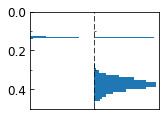

In [4]:
# inversion dataset
refH = 1313 #height of Iwo-yama in m
inv_files = [os.path.join(inv_dir, i) for i in ['Iwo2017pre/invert_1_2_C/invert_1_2_C.mat', 
                                                'Iwo2017post/invert_1_2_C_C2/invert_1_2_C_C2.mat']]
ds_names = [os.path.splitext(os.path.basename(i))[0] for i in inv_files]
m_codes = [i.split('invert_1_2_')[1].split('_')[-1] for i in ds_names]

# plot
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=[2, 1.5], sharey=True)
for i, ax in enumerate(axs):
    depths, depthO, dmin, dmax = read_GBIS_depth(inv_files[i], m_codes[i], burning=3e4, ref_height=refH)
    ax.hist(depths, bins=20, range=(dmin, dmax), color='C0', orientation='horizontal', density=True)
    if ds_names[i] == 'invert_1_2_C_C2':
        depthO = read_GBIS_depth(inv_files[i], 'C', burning=3e4, ref_height=refH)[1]
        ax.axhline(y=depthO, xmax=0.9, c='C0', linestyle='-', linewidth=1)

# axis format
for ax in axs:
    ax.tick_params(which='both', direction='in', labelsize=font_size, bottom=False, top=False, left=True, right=False)
    ax.yaxis.set_major_locator(ticker.MultipleLocator(0.200))
    ax.set_xticks([])
    ax.invert_yaxis()
    ax.set_ylim(0.5, 0.0)
axs[0].yaxis.set_minor_locator(ticker.MultipleLocator(0.100))
axs[0].spines['right'].set_visible(False)
#axs[0].tick_params(labelleft=True)
axs[1].tick_params(left=False)
axs[1].spines['left'].set_visible(False)
axs[1].plot((0,0), (0,1), '--', transform=axs[1].transAxes, color='k')
fig.subplots_adjust(wspace=0, left=0.05, right=0.95, top=0.95, bottom=0.05)

# output
out_file = os.path.abspath('depths_PDF_Iwo.png')
plt.savefig(out_file, bbox_inches='tight', transparent=True, dpi=fig_dpi)
print('save figure to', out_file)
plt.show()